# Random Forest for Feature Reduction

In [1]:
# Data Loading
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Resampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Model
from sklearn.ensemble import RandomForestClassifier

## ALL WORDS

In [3]:
# Read dataset
df = pd.read_csv('input_new_categories.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218922 entries, 0 to 218921
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18922 non-null  object
 1   type    18922 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [5]:
df = df.dropna()

In [6]:
# Clarify independent and dependent variables
x = df['text']
y = df['type']

# Split datasets into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
# Specify vectorizer to be used
vectorizer = TfidfVectorizer()

In [8]:
# Create vectorized versions of all raw_x datasets
vector_xtrain = vectorizer.fit_transform(xtrain)
vector_xtest = vectorizer.transform(xtest)

In [9]:
# Create OS and US sets
overs = RandomOverSampler(random_state = 0)
vector_xtrain_os, ytrain_os = overs.fit_resample(vector_xtrain, ytrain)

unders = RandomUnderSampler(random_state = 0)
vector_xtrain_us, ytrain_us = unders.fit_resample(vector_xtrain, ytrain)

### No Resampling

In [11]:
# Define the model
rf = RandomForestClassifier(random_state = 0)

# Fit the model
rf.fit(vector_xtrain, ytrain)

# Make predictions
preds = rf.predict(vector_xtest)

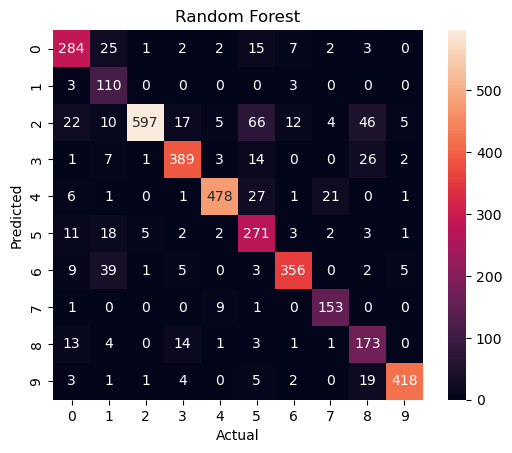

In [12]:
# Plot a confusion matrix
mat = confusion_matrix(ytest, preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.title('Random Forest')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [13]:
# Generate classification report
print('Random Forest')
print(classification_report(ytest, preds))

Random Forest
                  precision    recall  f1-score   support

        database       0.83      0.80      0.82       353
  database_admin       0.95      0.51      0.66       215
          deploy       0.76      0.99      0.86       606
   elasticsearch       0.88      0.90      0.89       434
          fastly       0.89      0.96      0.92       500
           redis       0.85      0.67      0.75       405
       resources       0.85      0.92      0.88       385
        sendgrid       0.93      0.84      0.88       183
upgrade_services       0.82      0.64      0.72       272
          upsize       0.92      0.97      0.94       432

        accuracy                           0.85      3785
       macro avg       0.87      0.82      0.83      3785
    weighted avg       0.86      0.85      0.85      3785



RECALL RANGE: .48
RECALL MIN: .51
PRECISION MIN: .76

### Oversampling

In [14]:
# Define the model
rfo = RandomForestClassifier(random_state = 0)

# Fit the model
rfo.fit(vector_xtrain_os, ytrain_os)

# Make predictions
preds = rfo.predict(vector_xtest)

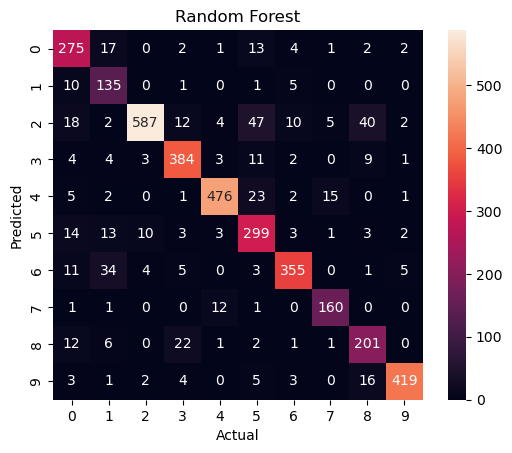

In [15]:
# Plot a confusion matrix
mat = confusion_matrix(ytest, preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.title('Random Forest')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [16]:
# Generate classification report
print('Random Forest')
print(classification_report(ytest, preds))

Random Forest
                  precision    recall  f1-score   support

        database       0.87      0.78      0.82       353
  database_admin       0.89      0.63      0.74       215
          deploy       0.81      0.97      0.88       606
   elasticsearch       0.91      0.88      0.90       434
          fastly       0.91      0.95      0.93       500
           redis       0.85      0.74      0.79       405
       resources       0.85      0.92      0.88       385
        sendgrid       0.91      0.87      0.89       183
upgrade_services       0.82      0.74      0.78       272
          upsize       0.92      0.97      0.95       432

        accuracy                           0.87      3785
       macro avg       0.87      0.85      0.86      3785
    weighted avg       0.87      0.87      0.87      3785



RECALL RANGE: .34
RECALL MIN: .63
PRECISION MIN: .82

### Undersampling

In [17]:
# Define the model
rfu = RandomForestClassifier(random_state = 0)

# Fit the model
rfu.fit(vector_xtrain_us, ytrain_us)

# Make predictions
preds = rfu.predict(vector_xtest)

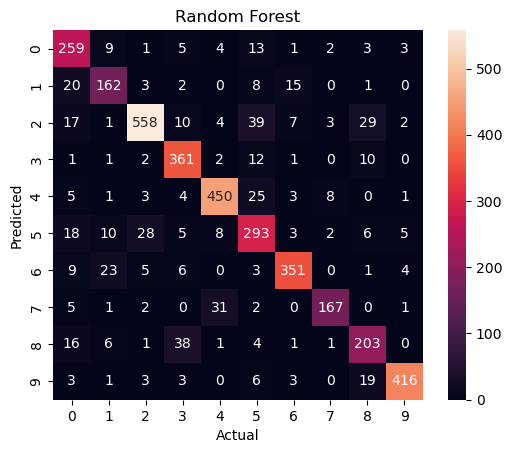

In [18]:
# Plot a confusion matrix
mat = confusion_matrix(ytest, preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.title('Random Forest')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [19]:
# Generate classification report
print('Random Forest')
print(classification_report(ytest, preds))

Random Forest
                  precision    recall  f1-score   support

        database       0.86      0.73      0.79       353
  database_admin       0.77      0.75      0.76       215
          deploy       0.83      0.92      0.87       606
   elasticsearch       0.93      0.83      0.88       434
          fastly       0.90      0.90      0.90       500
           redis       0.78      0.72      0.75       405
       resources       0.87      0.91      0.89       385
        sendgrid       0.80      0.91      0.85       183
upgrade_services       0.75      0.75      0.75       272
          upsize       0.92      0.96      0.94       432

        accuracy                           0.85      3785
       macro avg       0.84      0.84      0.84      3785
    weighted avg       0.85      0.85      0.85      3785



RECALL RANGE: .24
RECALL MIN: .72
PRECISION MIN: .77

## Feature Importance from Best Model

In [21]:
# find feature importance
words = vectorizer.get_feature_names_out()
imp = rfu.feature_importances_
df1 = pd.DataFrame({'Features': words,
                    'Importance': imp})
df1 = df1.sort_values('Importance', ascending = False)

# Export word list with importances
df1.to_csv('rf_feature_importance_new_categories.csv', index=False)